In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
%matplotlib inline

In [19]:
from wishpy.dataworker import DataWorker
dw = DataWorker(google_secret='../wishpy/client_secret.json')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/wishpy/dataworker.py:83: UserWarning: [Errno 2] No such file or directory: '../wishpy/client_secret.json'
  warnings.warn(str(e))


# Preparing datasets

In [20]:
path = "/Users/zzhang/Desktop/zzhang_logistics/cn_post/"
dataset = os.path.join(path , "cn_post_2020_rate_card.csv")

cn_post_rate = pd.read_csv(dataset)
cn_post_rate.drop('cn_country',axis=1,inplace=True)
cn_post_rate.head()

,en_country,country_code,unreg_u30_2020,unreg_30_80_2020,unreg_a80_2020,reg_0_150_2020,reg_0_150_piece_2020,reg_150_300_2020,reg_150_300_piece_2020,reg_a300_2020,reg_a300_piece_2020,unreg_u30_2019,unreg_30_80_2019,unreg_a80_2019,reg_0_150_2019,reg_0_150_piece_2019,reg_150_300_2019,reg_150_300_piece_2019,reg_a300_2019,reg_a300_piece_2019
0,Guernsey,GG,7.70,76.38,57.16,54.49,21.36,54.49,21.36,54.49,21.36,9.00,102.00,81.50,130.0,14.5,130.0,14.5,130.0,14.5
1,Cook Islands,CK,8.32,104.33,85.10,87.71,26.33,87.71,26.33,87.71,26.33,9.00,102.00,81.50,103.5,14.5,103.5,14.5,103.5,14.5
2,Uruguay,UY,8.31,103.82,84.59,83.17,21.36,83.17,21.36,83.17,21.36,8.50,103.50,84.00,100.0,17.0,100.0,17.0,100.0,17.0
3,Jersey,JE,8.95,83.43,60.73,57.26,20.36,57.26,20.36,57.26,20.36,9.00,102.00,81.50,130.0,14.5,130.0,14.5,130.0,14.5
4,Slovakia,SK,7.31,64.67,47.86,53.00,15.50,54.00,14.50,43.00,16.00,7.32,67.29,47.86,55.0,14.5,55.0,14.5,44.0,16.0


In [230]:
path = "/Users/zzhang/Desktop/datasets/"
dataset = os.path.join(path , "wish_post_weight_2019.csv")
df_weight = pd.read_csv(dataset,parse_dates=['order_month'],usecols=['order_recipient_country_short_en','order_month','registered','actual_weight'])

#df_weight = dw.td_query(engine='hive' , job_id=638672460)
df_weight.head()

,order_recipient_country_short_en,order_month,registered,actual_weight
0,AD,2019-05-01,False,0.033
1,AD,2019-05-01,True,0.208
2,AD,2019-05-01,True,0.228
3,AD,2019-05-01,False,0.017
4,AD,2019-05-01,True,0.155


In [231]:
#df_weight['order_month']=pd.to_datetime(df_weight['order_month'],format='%Y-%m')
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78334430 entries, 0 to 78334429
Data columns (total 4 columns):
order_recipient_country_short_en    object
order_month                         datetime64[ns]
registered                          bool
actual_weight                       float64
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ GB


In [232]:
# df_join = df_weight.merge(cn_post_rate,how='left',left_on='order_recipient_country_short_en',right_on='country_code')
# df_join.head()

In [233]:
# df_join.info()
#df_join.columns

In [234]:
# def cost_func_2020(data):
#     #for Unregistered shipment
#     if data['registered']== False:
#         if (data['actual_weight']<=0.03):
#             shipping_cost_2020 = data['unreg_u30_2020']
            
#         elif (data['actual_weight']>0.03 & data['actual_weight']<=0.08):
#             shipping_cost_2020 = data['unreg_u30_2020'] + (data['actual_weight']-0.03)*data['unreg_30_80_2020']
            
#         elif (data['actual_weight']>0.08):
#             shipping_cost_2020 = data['unreg_u30_2020'] + (data['actual_weight']-0.03)*data['unreg_a80_2020']
            
#     #for Registered shipment:
#     elif data['registered']== True:
#         if (data['actual_weight']<=0.15):
#             shipping_cost_2020 = data['reg_0_150_piece_2020'] + data['actual_weight']*data['reg_0_150_2020']
            
#         elif (data['actual_weight']>0.15 & data['actual_weight']<=0.30):
#             shipping_cost_2020 = data['reg_150_300_piece_2020'] + data['actual_weight']*data['reg_150_300_2020']
            
#         elif (data['actual_weight']>0.3):
#             shipping_cost_2020 = data['reg_a300_piece_2020'] + data['actual_weight']*data['reg_a300_2020']
            
#     return shipping_cost_2020;

In [237]:
# def cost_func_2019(data):
#     #for Unregistered shipment
#     if data['registered']== False:
#         if (data['actual_weight']<=0.03):
#             shipping_cost_2019 = data['unreg_u30_2019']
            
#         elif (data['actual_weight']>0.03 & data['actual_weight']<=0.08):
#             shipping_cost_2019 = data['unreg_u30_2019'] + (data['actual_weight']-0.03)*data['unreg_30_80_2019']
            
#         elif (data['actual_weight']>0.08):
#             shipping_cost_2019 = data['unreg_u30_2019'] + (data['actual_weight']-0.03)*data['unreg_a80_2019']
            
#     #for Registered shipment:
#     elif data['registered']== True:
#         if (data['actual_weight']<=0.15):
#             shipping_cost_2019 = data['reg_0_150_piece_2019'] + data['actual_weight']*data['reg_0_150_2019']
            
#         elif (data['actual_weight']>0.15 & data['actual_weight']<=0.30):
#             shipping_cost_2019 = data['reg_150_300_piece_2019'] + data['actual_weight']*data['reg_150_300_2019']
            
#         elif (data['actual_weight']>0.3):
#             shipping_cost_2019 = data['reg_a300_piece_2019'] + data['actual_weight']*data['reg_a300_2019']
            
#     return shipping_cost_2019;

In [235]:
# df_join['shipping_cost_2019'] = df_join.apply(cost_func_2019, axis=1)
# df_join.head()

In [236]:
# df_join['shipping_cost_2020'] = df_join.apply(cost_func_2020, axis=1)
# df_join.head()

# 2019 Weight distribution analysis

## overall weight distribution

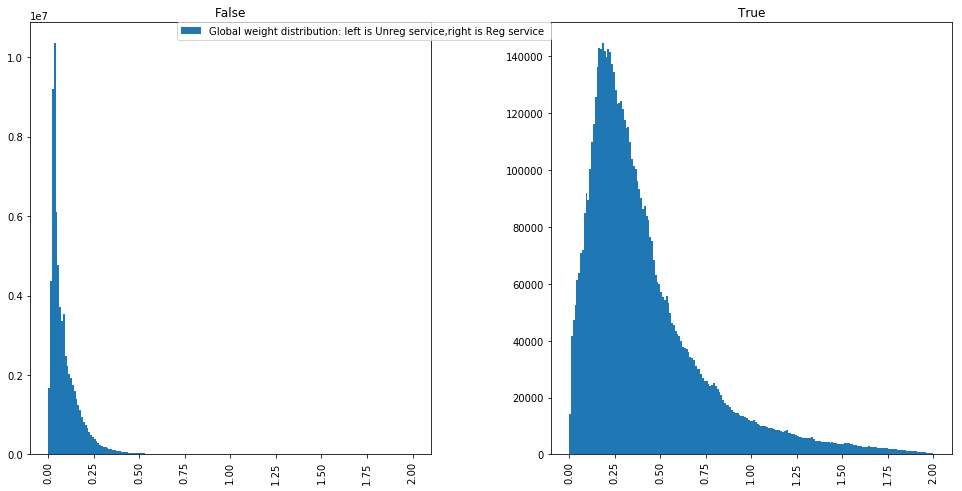

In [264]:
n_bins = 200
#plt.hist(df_weight.actual_weight,bins=n_bins,by=df_weight.registered, label='Global weight distribution')
df_weight.actual_weight.hist(bins=n_bins,by=df_weight.registered, label='Global weight distribution: left is Unreg service,right is Reg service ',figsize=(16,8))
plt.legend(bbox_to_anchor=(0, 1), loc=0, borderaxespad=0.)
plt.show()

## USA weight distribution

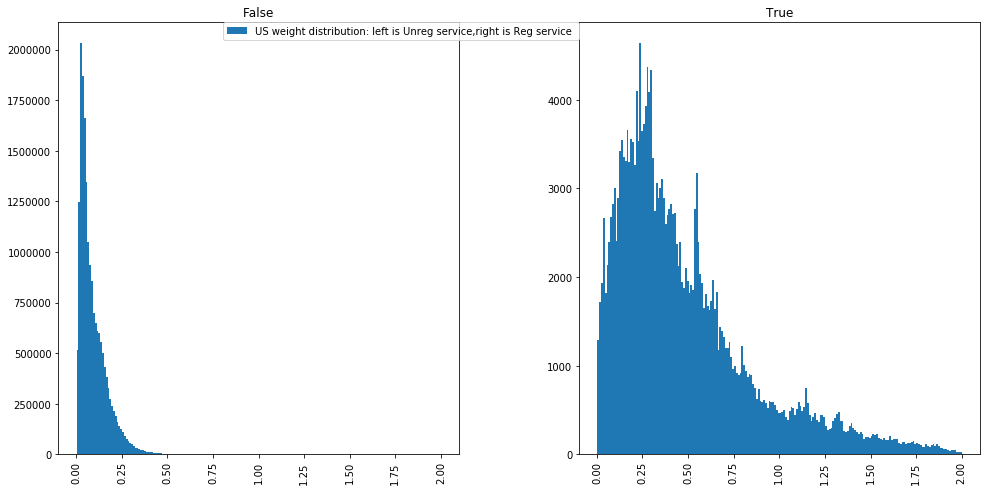

In [267]:
n_bins = 200
#plt.hist(df_weight.actual_weight,bins=n_bins,by=df_weight.registered, label='Global weight distribution')
df_weight.loc[df_weight.order_recipient_country_short_en=='US','actual_weight'].hist(bins=n_bins,by=df_weight.registered, label='US weight distribution: left is Unreg service,right is Reg service ',figsize=(16,8))
plt.legend(bbox_to_anchor=(0, 1), loc=0, borderaxespad=0.)
plt.show()

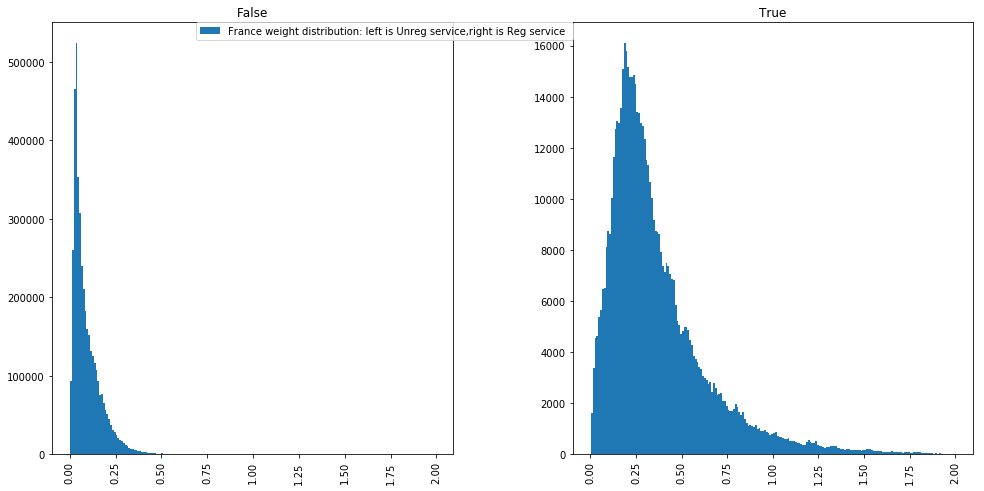

In [268]:
n_bins = 200
#plt.hist(df_weight.actual_weight,bins=n_bins,by=df_weight.registered, label='Global weight distribution')
df_weight.loc[df_weight.order_recipient_country_short_en=='FR','actual_weight'].hist(bins=n_bins,by=df_weight.registered, label='France weight distribution: left is Unreg service,right is Reg service ',figsize=(16,8))
plt.legend(bbox_to_anchor=(0, 1), loc=0, borderaxespad=0.)
plt.show()

# 2019 and 2020 rate card projection graph

In [211]:
min_weight = 0.01
max_weight = 0.5

In [212]:
def unreg_cost_2019(rate):
    weight = list(np.linspace(min_weight, max_weight, num=400))
    unreg_cost_2019 = []

    for w in weight:
        w = float(w)
        
        if (w<=0.03):
            cost = rate['unreg_u30_2019']
            
        elif ((w > 0.03) & (w <= 0.08)):
            cost = rate['unreg_u30_2019'] + (w-0.03)*rate['unreg_30_80_2019']
            
        elif (w > 0.08):
            cost = rate['unreg_u30_2019'] + (w-0.03)*rate['unreg_a80_2019']
        
        unreg_cost_2019.append(cost)
    
    unreg_cost_2019 = pd.DataFrame(unreg_cost_2019)
    unreg_cost_2019.reset_index(inplace=True,drop=True)
    
    return unreg_cost_2019;

In [213]:
def reg_cost_2019(rate):
    weight = list(np.linspace(min_weight, max_weight, num=400))
    reg_cost_2019 = []

    for w in weight:
        w = float(w)
        
        if (w<=0.15):
            cost = rate['reg_0_150_piece_2019'] + w * rate['reg_0_150_2019']
            
        elif ((w>0.15) & (w<=0.30)):
            cost = rate['reg_150_300_piece_2019'] + w * rate['reg_150_300_2019']
            
        elif (w>0.3):
            cost = rate['reg_a300_piece_2019'] + w * rate['reg_a300_2019']
        
        reg_cost_2019.append(cost)
    
    reg_cost_2019 = pd.DataFrame(reg_cost_2019)
    reg_cost_2019.reset_index(inplace=True,drop=True)
    
    return reg_cost_2019;

In [214]:
def unreg_cost_2020(rate):
    weight = list(np.linspace(min_weight, max_weight, num=400))
    unreg_cost_2020 = []

    for w in weight:
        w = float(w)
        
        if (w<=0.03):
            cost = rate['unreg_u30_2020']
            
        elif ((w > 0.03) & (w <= 0.08)): 
            cost = rate['unreg_u30_2020'] + (w-0.03)*rate['unreg_30_80_2020']
            
        elif (w > 0.08):
            cost = rate['unreg_u30_2020'] + (w-0.03)*rate['unreg_a80_2020']
        
        unreg_cost_2020.append(cost)
    
    unreg_cost_2020 = pd.DataFrame(unreg_cost_2020)
    unreg_cost_2020.reset_index(inplace=True,drop=True)
    
    return unreg_cost_2020;

In [215]:
def reg_cost_2020(rate):
    weight = list(np.linspace(min_weight, max_weight, num=400))
    reg_cost_2020 = []

    for w in weight:
        w = float(w)
        
        if (w<=0.15):
            cost = rate['reg_0_150_piece_2020'] + w * rate['reg_0_150_2020']
            
        elif ((w>0.15) & (w<=0.30)):
            cost = rate['reg_150_300_piece_2020'] + w * rate['reg_150_300_2020']
            
        elif (w>0.3):
            cost = rate['reg_a300_piece_2020'] + w * rate['reg_a300_2020']
        
        reg_cost_2020.append(cost)
    
    reg_cost_2020 = pd.DataFrame(reg_cost_2020)
    reg_cost_2020.reset_index(inplace=True,drop=True)
    return reg_cost_2020;

In [228]:
def rate_card_plot(country):
    rate = cn_post_rate.loc[cn_post_rate['country_code']==country,]
    
    weight = pd.DataFrame(np.linspace(min_weight, max_weight, num=400),columns=['weight'])
    
    unreg_shipping_2019 = unreg_cost_2019(rate)
    reg_shipping_2019 = reg_cost_2019(rate)
    unreg_shipping_2020 = unreg_cost_2020(rate)
    reg_shipping_2020 = reg_cost_2020(rate)
    
    cn_post_shipping_cost = pd.concat([weight, unreg_shipping_2019,reg_shipping_2019,unreg_shipping_2020,reg_shipping_2020], axis=1, sort=False)
    cn_post_shipping_cost.columns = ['weight', 'unreg_shipping_2019','reg_shipping_2019','unreg_shipping_2020','reg_shipping_2020']
    
    print('-'*150)
    print('-'*150)
    print("Below graph are Unregistered shipping cost chart for country = %s " %country)
    plt.figure(figsize=(20,10))
    plt.plot(cn_post_shipping_cost.weight,cn_post_shipping_cost.unreg_shipping_2019,'r--',label='unreg_shipping_2019')
    plt.plot(cn_post_shipping_cost.weight,cn_post_shipping_cost.unreg_shipping_2020,'b-',label='unreg_shipping_2020')
    plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.)
    plt.show()
    
    print('-'*150)
    print("Below graph are Registered shipping cost chart for country = %s " %country)
    plt.figure(figsize=(20,10))
    plt.plot(cn_post_shipping_cost.weight,cn_post_shipping_cost.reg_shipping_2019,'r--',label='reg_shipping_2019')
    plt.plot(cn_post_shipping_cost.weight,cn_post_shipping_cost.reg_shipping_2020,'b-',label='reg_shipping_2020')
    plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.)
    plt.show()
    print('-'*150)

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = US 


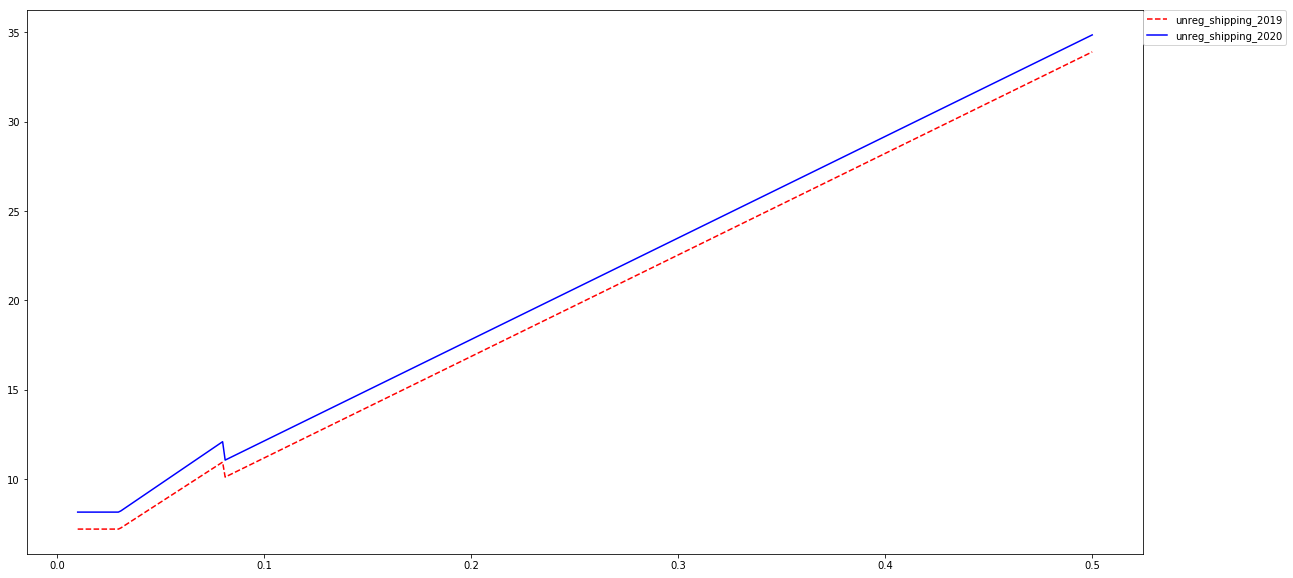

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = US 


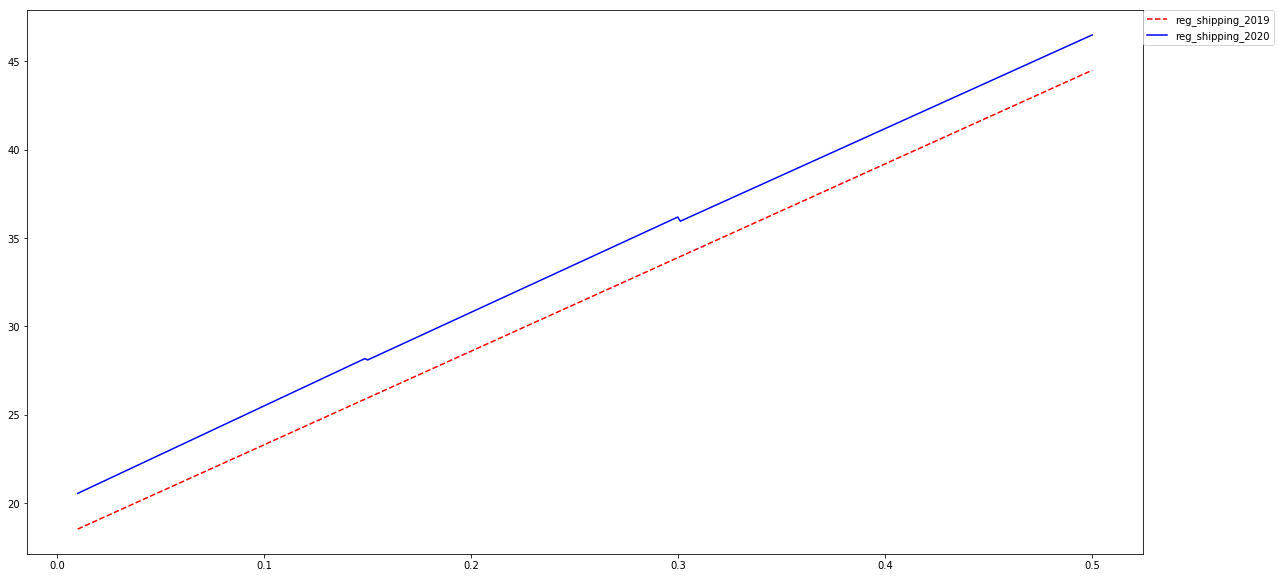

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = FR 


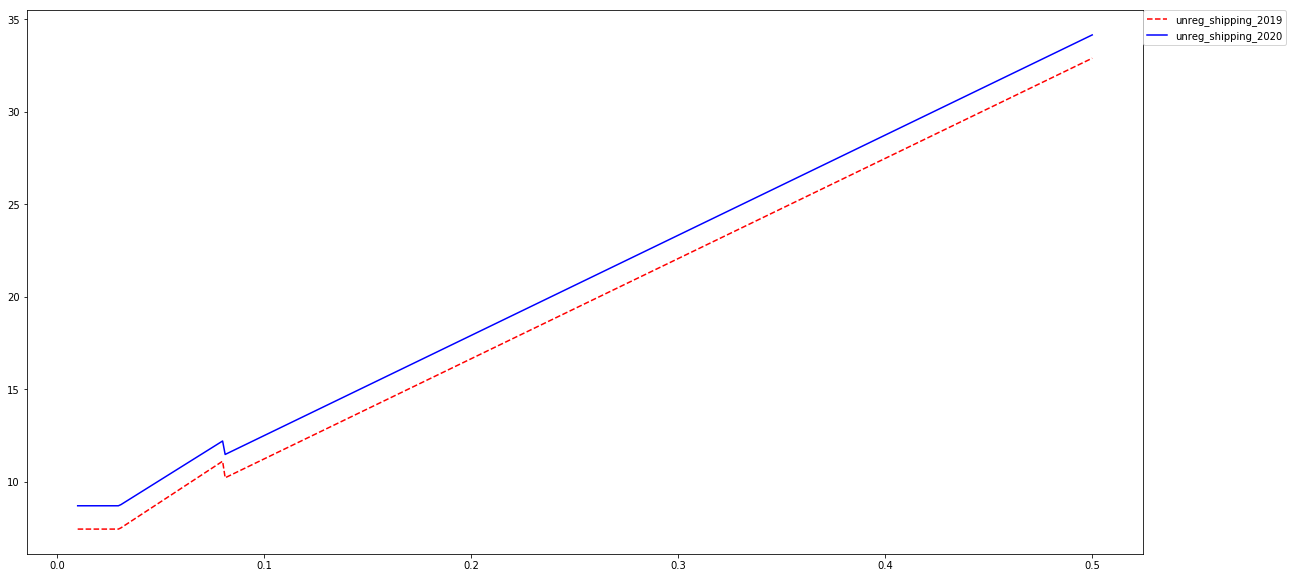

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = FR 


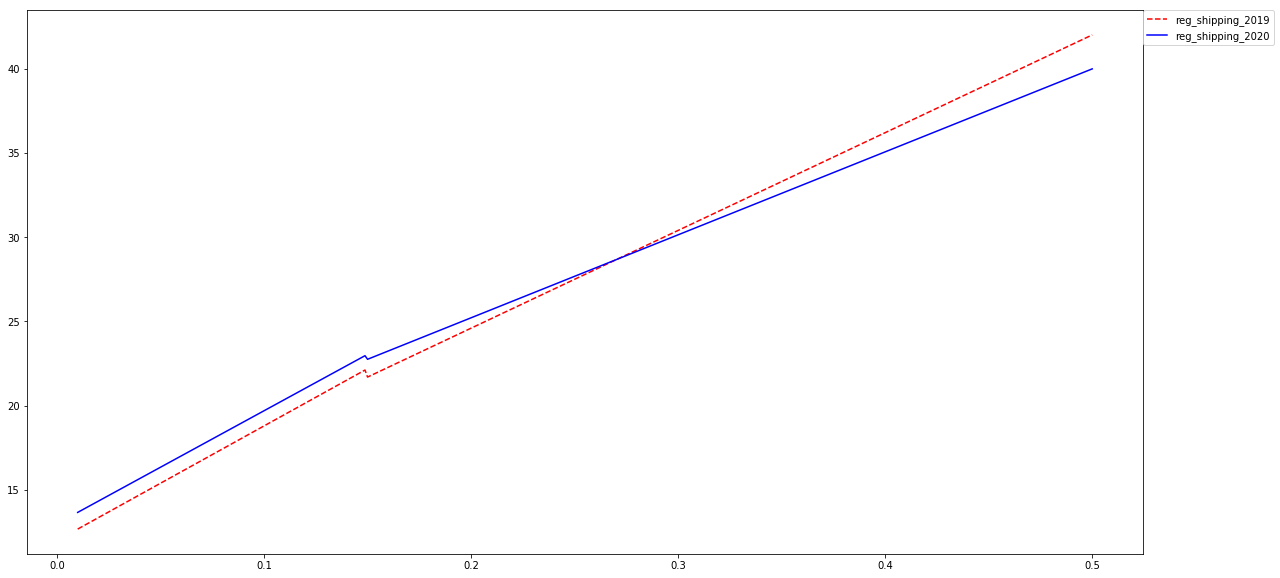

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = GB 


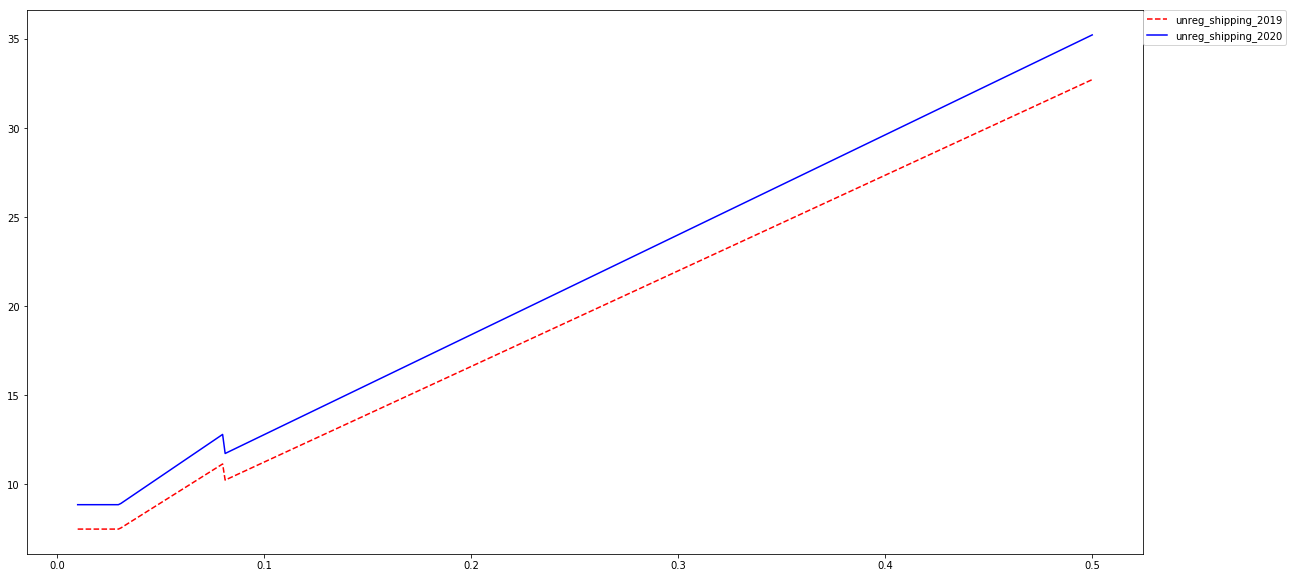

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = GB 


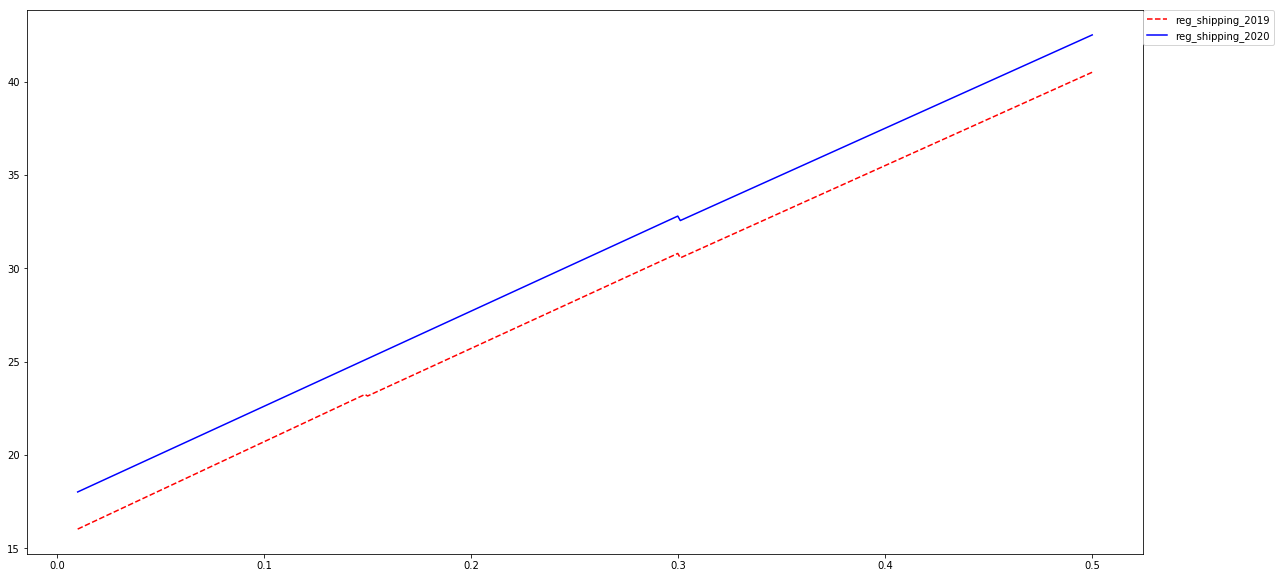

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = DE 


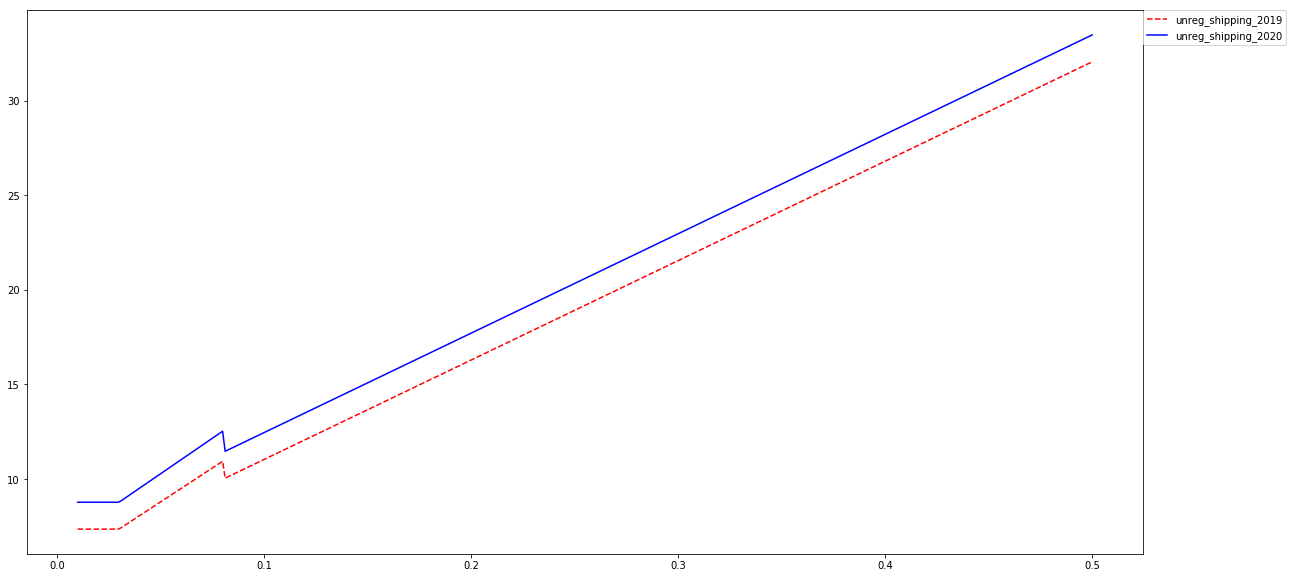

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = DE 


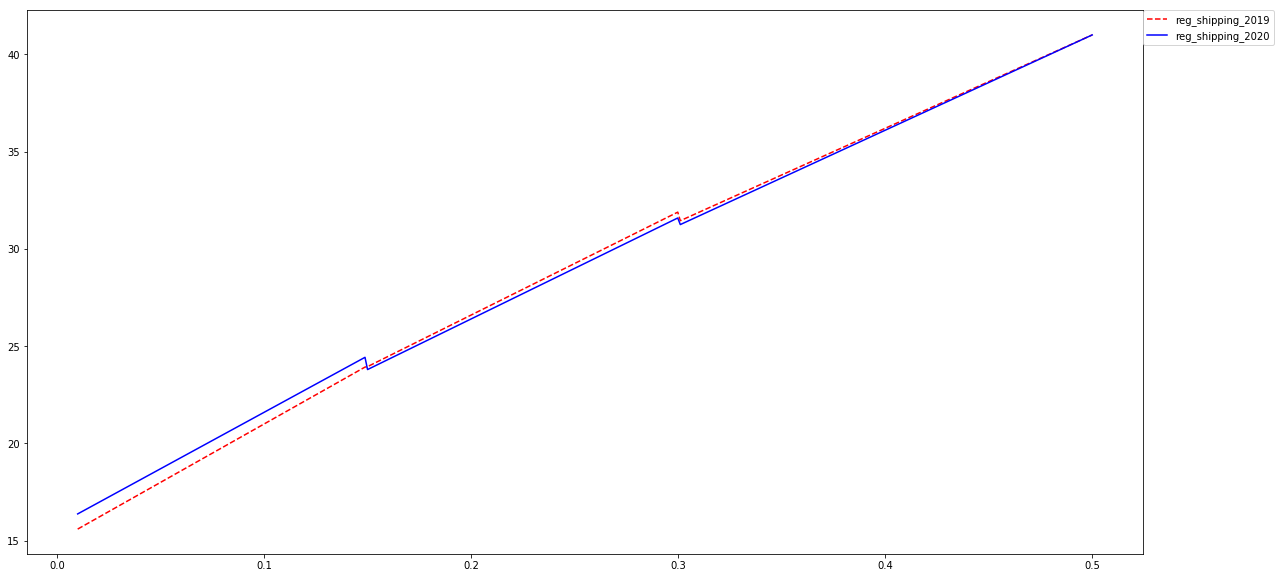

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = AU 


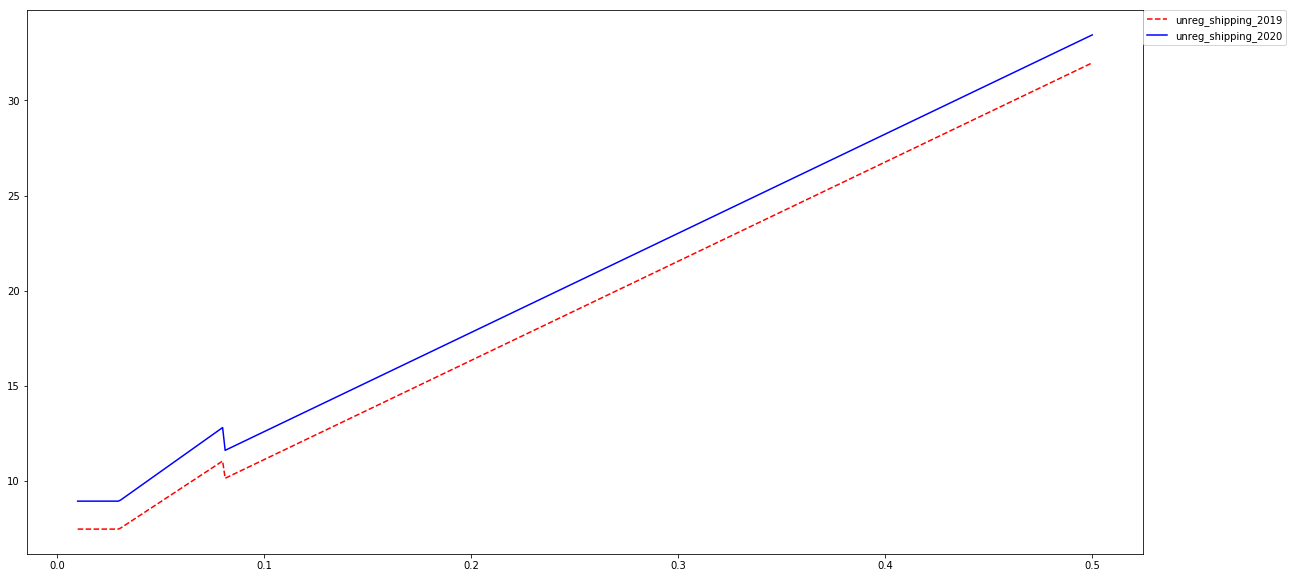

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = AU 


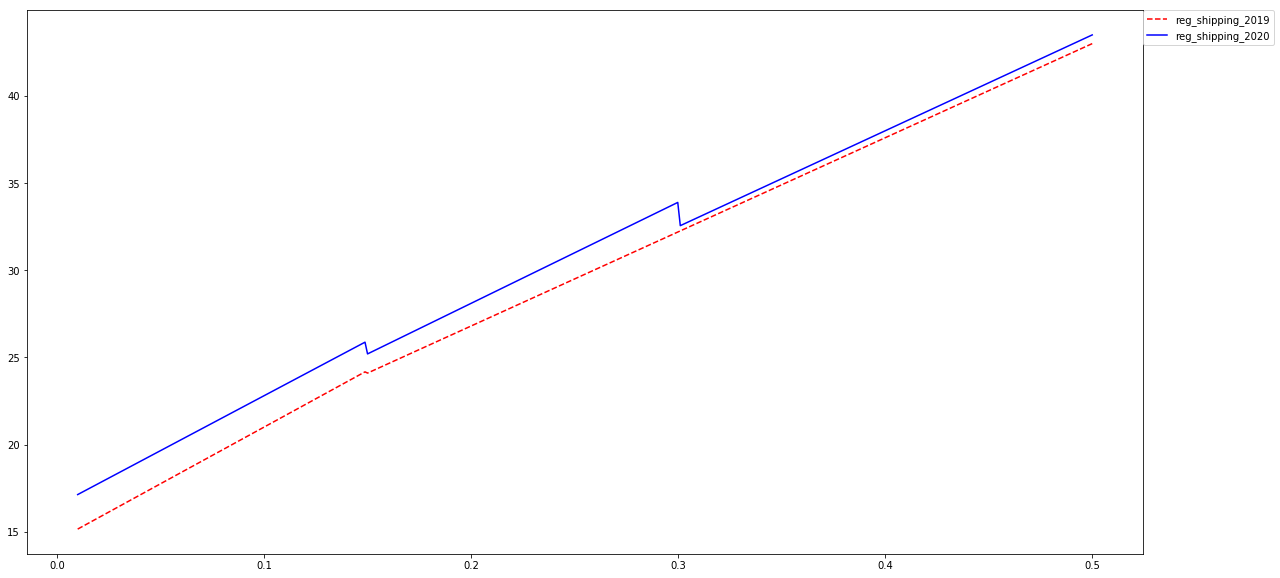

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = CH 


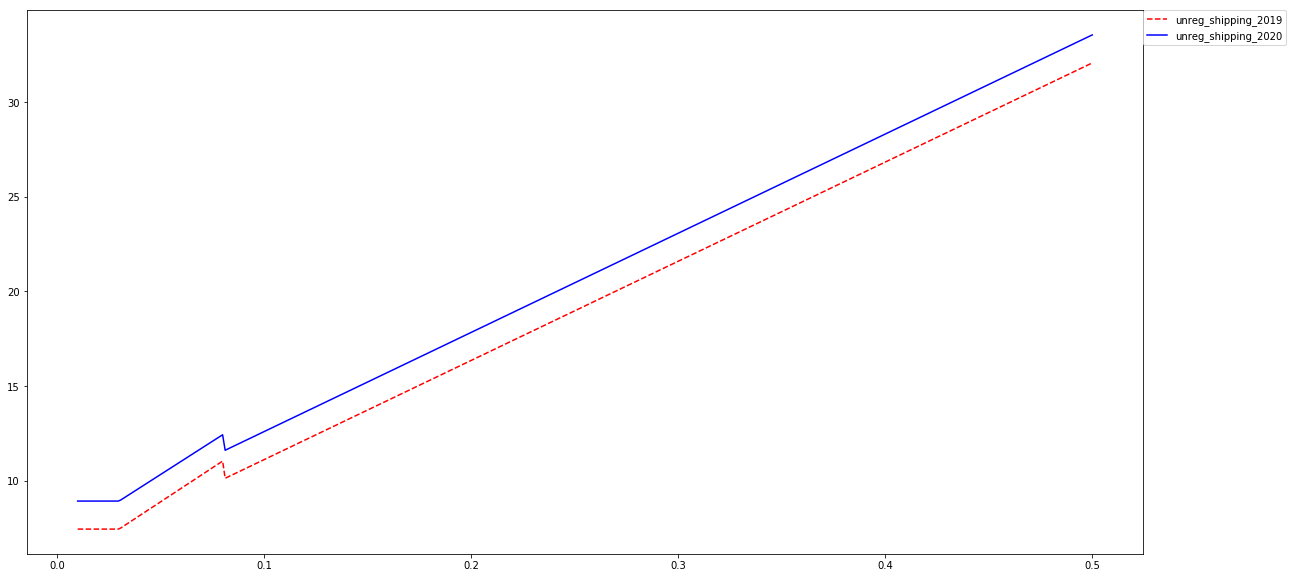

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = CH 


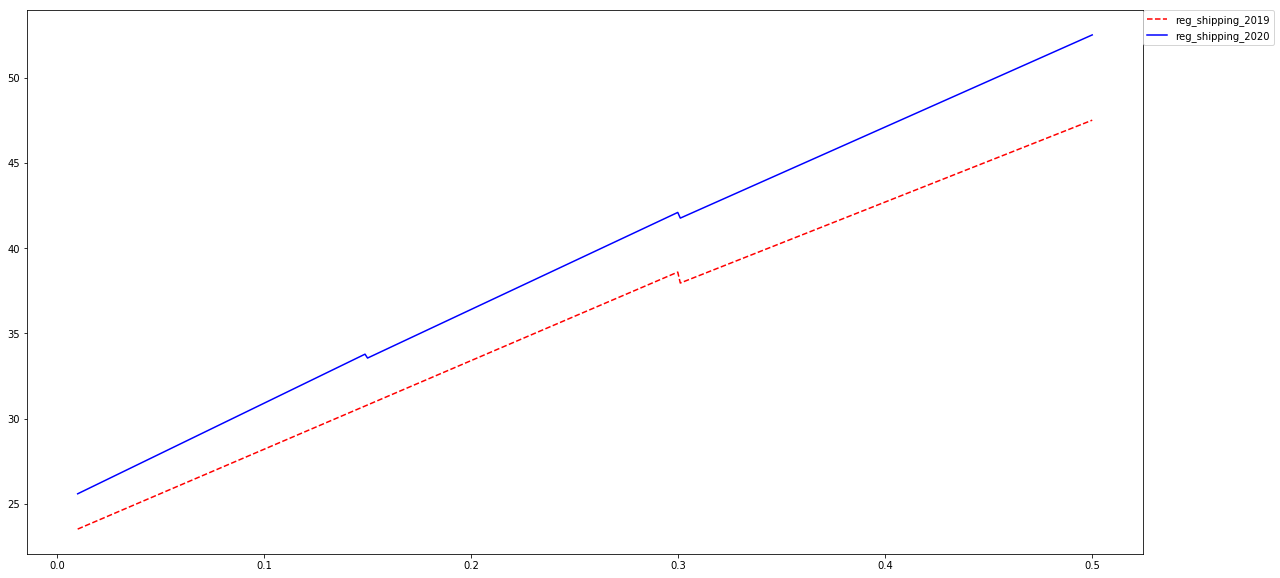

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Unregistered shipping cost chart for country = BR 


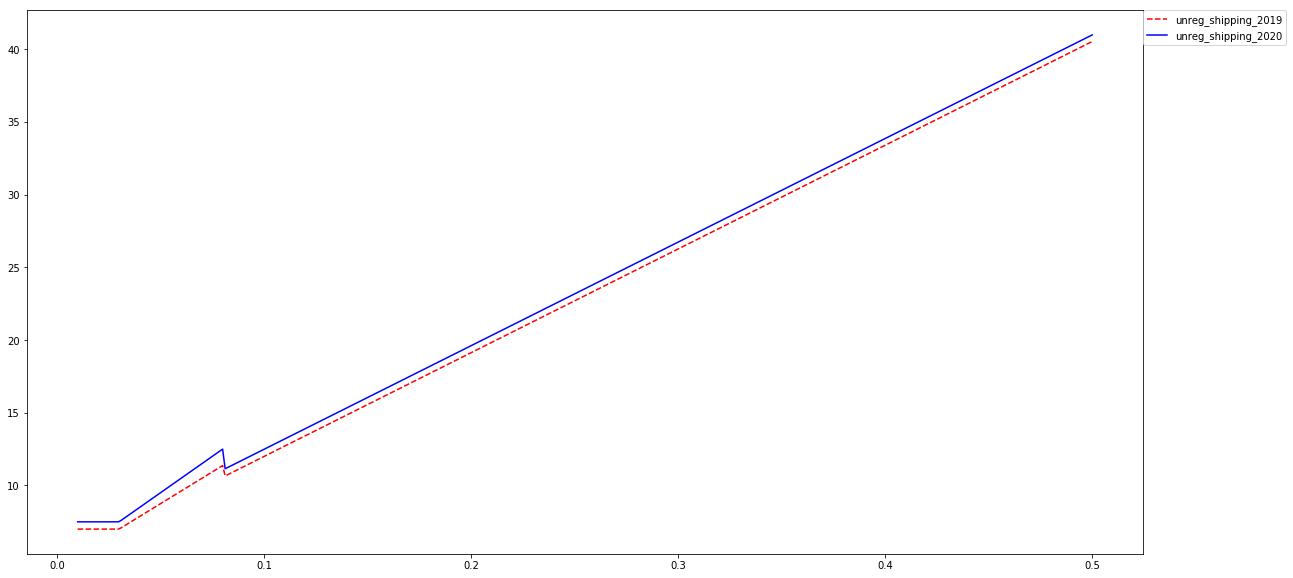

------------------------------------------------------------------------------------------------------------------------------------------------------
Below graph are Registered shipping cost chart for country = BR 


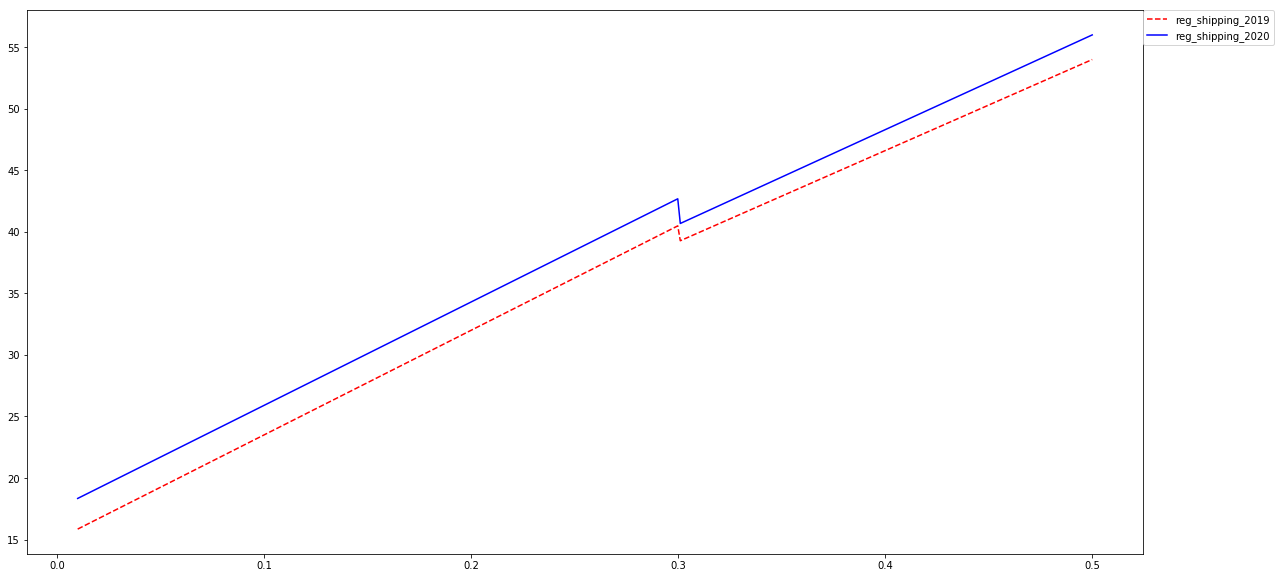

------------------------------------------------------------------------------------------------------------------------------------------------------


In [229]:
countries = ['US','FR','GB','DE','AU','CH','BR']
for country in countries:
    rate_card_plot(country)